In [57]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

In [58]:
import os
print(os.getcwd())


/Users/estelavonraesfeldfabre


In [59]:
activity = pd.read_csv('daily-activity.csv')
sleep = pd.read_csv('daily-sleep.csv')
readiness = pd.read_csv('daily-readiness.csv')

In [60]:
#activity['date'] = pd.to_datetime(activity['date'])
#sleep['date'] = pd.to_datetime(sleep['date'])
#readiness['date'] = pd.to_datetime(readiness['date']

In [61]:
# === Readiness ===

readiness['date'] = pd.to_datetime(readiness['day'])
readiness = readiness.rename(columns={
    'score': 'readiness_score',
    'contributors_resting_heart_rate': 'resting_heart_rate',
    'contributors_hrv_balance': 'hrv'
})
readiness_shifted = readiness[['date', 'readiness_score', 'hrv', 'resting_heart_rate']].copy()
readiness_shifted['date'] = readiness_shifted['date'] - pd.Timedelta(days=1)

# === Sleep ===

sleep['date'] = pd.to_datetime(sleep['day'])
sleep = sleep.rename(columns={
    'score': 'sleep_score',
    'contributors_total_sleep': 'total_sleep'
})
sleep_shifted = sleep[['date', 'sleep_score', 'total_sleep']].copy()
sleep_shifted['date'] = sleep_shifted['date'] - pd.Timedelta(days=1)

# === Activity ===

activity['date'] = pd.to_datetime(activity['day'])

# Renombrar columnas si deseas hacerlas más legibles
activity = activity.rename(columns={
    'score': 'activity_score',
    'cal_total': 'total_calories',
    'steps': 'steps'
})

# Seleccionar columnas de interés
activity_shifted = activity[['date', 'activity_score', 'total_calories', 'steps']].copy()

# Desplazar un día si quieres alinear con readiness del día siguiente
activity_shifted['date'] = activity_shifted['date'] + pd.Timedelta(days=1)




In [62]:
# Unir todo por fecha
df = readiness_shifted.merge(sleep_shifted, on='date').merge(activity_shifted, on='date')

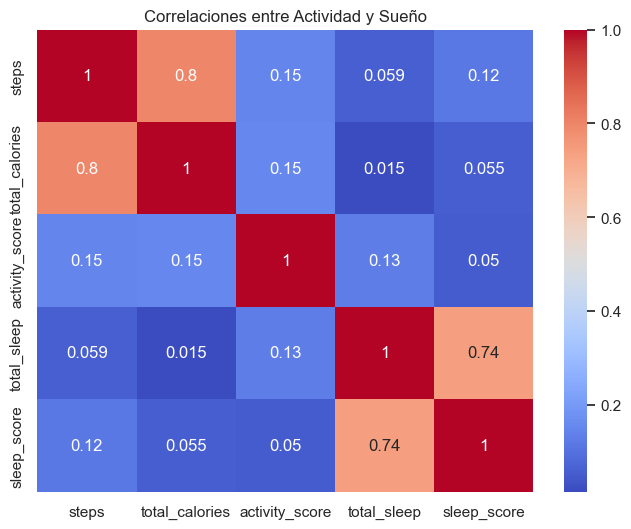

In [63]:


# Correlación entre actividad y sueño
corr = df[['steps', 'total_calories', 'activity_score', 'total_sleep', 'sleep_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre Actividad y Sueño')
plt.show()

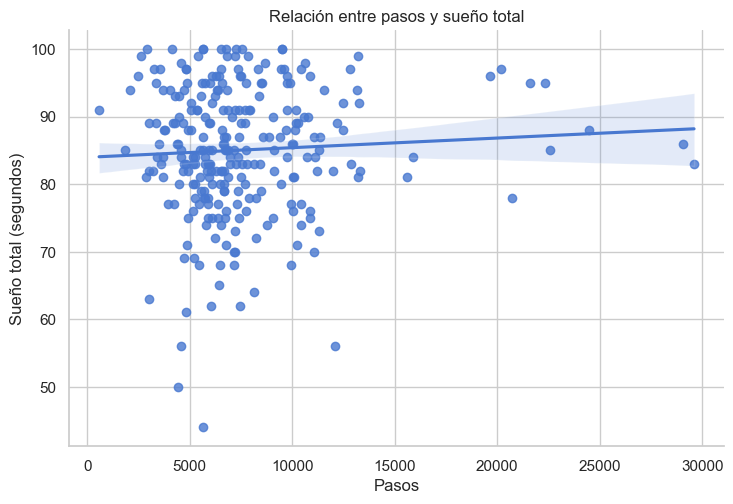

In [64]:
sns.lmplot(data=df, x='steps', y='total_sleep', height=5, aspect=1.5)
plt.title('Relación entre pasos y sueño total')
plt.xlabel('Pasos')
plt.ylabel('Sueño total (segundos)')
plt.show()

más pasos mejor sueño?

la actividad mejora el puntaje de sueño?

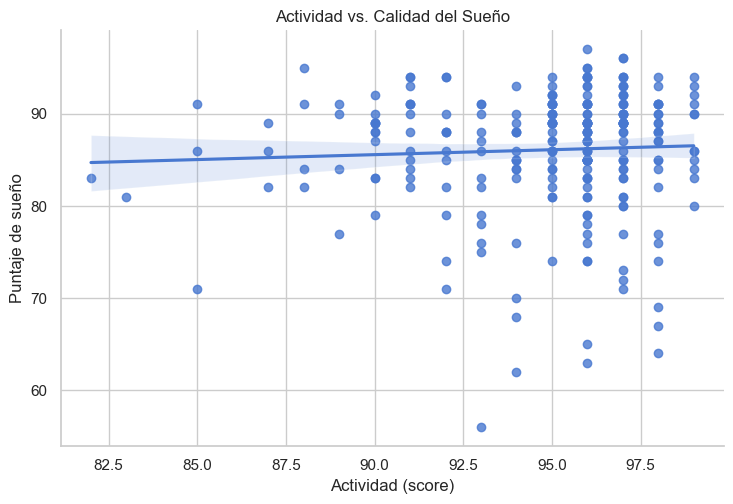

In [67]:
sns.lmplot(data=df, x='activity_score', y='sleep_score', height=5, aspect=1.5)
plt.title('Actividad vs. Calidad del Sueño')
plt.xlabel('Actividad (score)')
plt.ylabel('Puntaje de sueño')
plt.show()

clasificar los días según actividad 

In [69]:
# Calcular mediana de pasos
pasos_median = df['steps'].median()

# Crear columna de grupo de actividad
df['actividad'] = df['steps'].apply(lambda x: 'alta' if x >= pasos_median else 'baja')

comparar promedio de sueño por grupo 

In [71]:
# Agrupar por nivel de actividad y calcular medias
promedios = df.groupby('actividad')[['total_sleep', 'sleep_score']].mean()
print(promedios)

           total_sleep  sleep_score
actividad                          
alta         85.671642    86.813433
baja         84.428571    85.383459


visualizar con barras 

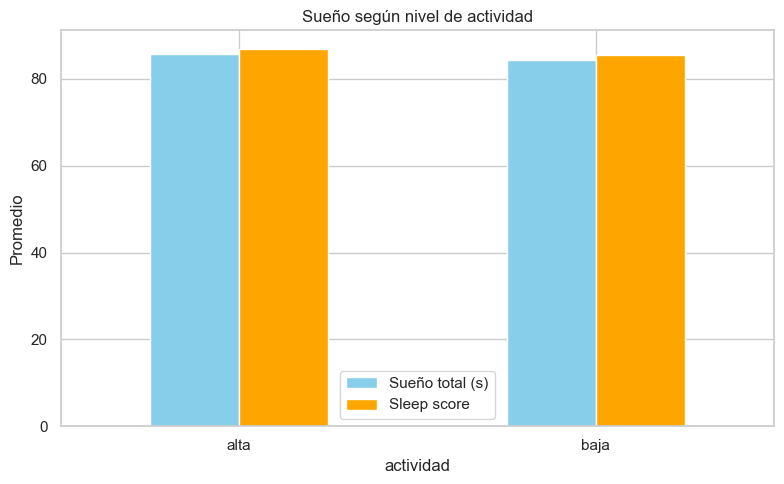

In [73]:
# Visualización
promedios.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Sueño según nivel de actividad')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(['Sueño total (s)', 'Sleep score'])
plt.tight_layout()
plt.show()

Based on my analysis of Oura Ring data, I found that both total sleep duration and sleep score remained relatively consistent regardless of whether my activity levels were high or low. This suggests that in my case, daily activity did not significantly impact overall sleep quality or quantity